# The problem:
Given a dataset of the Bay Area housing in the late 90's the model should learn to predict the median housing price in a given district (block of people ranging from 600 to 3000) given the other metrics.

# Checklist for machine learning projects:
- Frame the problem
- Get the Data
- Explore data to gain insights
- Prepare the data to better expose the underlying data patterns for machine learning algoritmhs
- Explore many different models and shortlist the best ones
- Fine-tune your models and combine them
- Present your solution
- Launch, monitor and mantain the system

## Frame the problem
Since the data already contains information about the median, we can reframe the problem as follows:

&nbsp;&nbsp;&nbsp;&nbsp;"Given some input and their respective outputs what is the function $h$ that maps the inputs to the outputs?"

Reframed like this the task is by definition a [Supervised Learning](Notes.MD#Supervised-Learning) task.
Since the median is a scalar value, we're dealing with a [Regression](Notes.MD#Regression) task (To be more precise is an univariate regression task because we're assuming that each block has only a single value, otherwise it would've been a multivariate regression).


## Get the data

In [118]:
# For the datasets
import pandas as pd

dataset = pd.read_csv("Data/Housing.csv")
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Create a test set
Even though it seems extremely early to do something like this, it is an important step to set aside data now, this is necessary in order to avoid Data snooping bias.
Our brain ha evolved to become an extraordinary patter recognition machine, thus we need to avoid stumbling onto some interesting patterns that will skew our decisions in the future.
On paper creating a test set is a simple task in fact we just need to partition the set taking indices at random, the problem is that when the data gets updated there's no guarantee that we won't explore all the dataset.
Fortunately there's a scikit-learn method that will help us

In [119]:
from sklearn.model_selection import train_test_split

train_set ,test_set = train_test_split(dataset,test_size =0.2,random_state=42)

Since the test_set has to remain untouched until the testing phase we could directly set the dataset as training set

In [120]:
dataset = pd.DataFrame(test_set)
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


## Explore data to gain insight
First let's see what pandas could tell us about the dataset

In [121]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 20046 to 3665
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      3921 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


In [122]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,4128.00000,4128.00000,4128.000000,4128.000000,3921.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,-119.51936,35.58671,28.764293,2610.796269,535.233104,1421.571705,497.750727,3.830338,205500.309593
std,1.99447,2.13276,12.518304,2209.359101,431.299704,1114.023136,387.770570,1.881515,114486.964288
min,-124.19000,32.54000,1.000000,6.000000,2.000000,8.000000,2.000000,0.499900,14999.000000
25%,-121.69000,33.93000,18.000000,1420.000000,294.000000,781.000000,278.000000,2.548500,119275.000000
50%,-118.47000,34.23000,29.000000,2110.000000,428.000000,1160.000000,406.000000,3.500000,178650.000000
75%,-117.99000,37.70000,37.000000,3099.250000,643.000000,1722.000000,598.000000,4.645925,263000.000000
max,-114.58000,41.81000,52.000000,37937.000000,5471.000000,16122.000000,5189.000000,15.000100,500001.000000


Then it might be useful to have some kind of visual insight

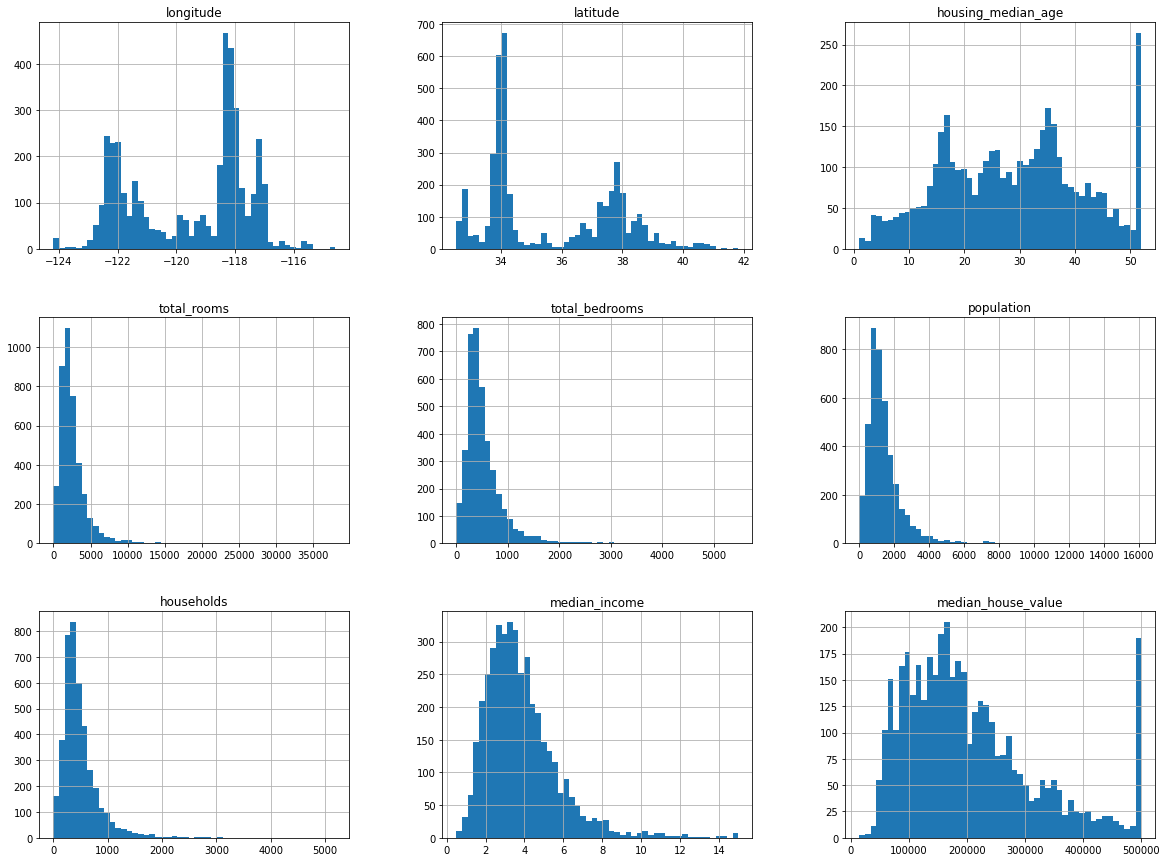

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins = 50, figsize=(20,15))
plt.show()

Looking at the features we have informations about longitude and magnitude, so in theory we should be able to visualize the data in a format that resembles the houses positions in California.
[For more information about the following options](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

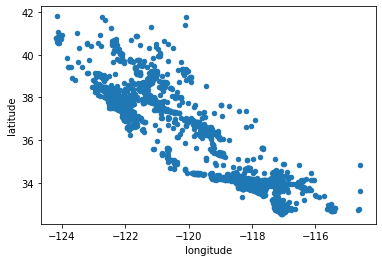

In [124]:
%matplotlib inline
dataset.plot(kind='scatter',x = 'longitude',y='latitude') 
plt.show()

But per se this scatterplot doesn't gives us informations but let's procede by steps
At first one important thing might be know what areas have a high density population

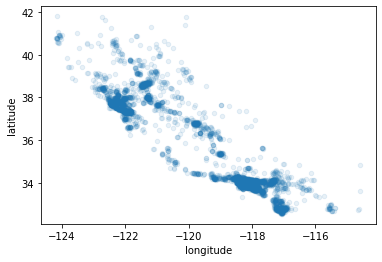

In [125]:
%matplotlib inline
# Alpha makes the individual points more transparent, thus a place with less points will be more
# transparent, and a place with a greater concentration of points will be darker
dataset.plot(kind='scatter',x = 'longitude',y='latitude',alpha=0.1)
plt.show()

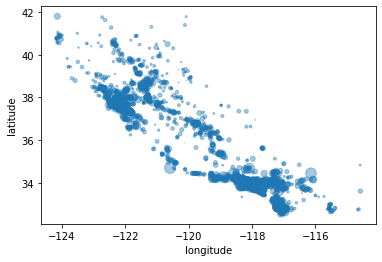

In [126]:
%matplotlib inline
# Every point is a different district, thus makes sense that the radius of each point is determined
# by the size of the population associated to that circle
dataset.plot(kind='scatter',x = 'longitude',y='latitude',alpha=0.4,s = dataset["population"]/100)
plt.show()

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

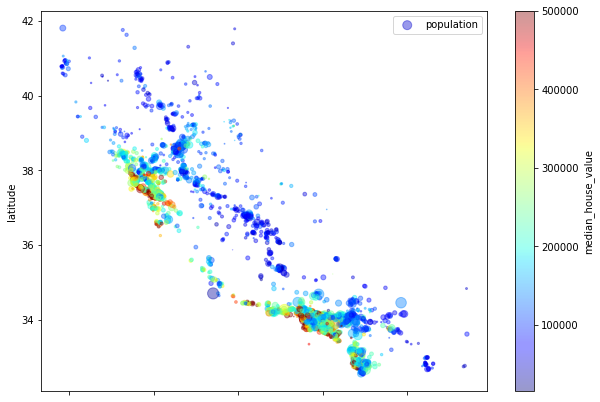

In [127]:
%matplotlib inline
# Every point is a different district, thus makes sense that the radius of each point is determined
# by the size of the population associated to that circle
import matplotlib.cm as cm
dataset.plot(kind='scatter',x = 'longitude',y='latitude',alpha=0.4,s = dataset["population"]/100,
            c = "median_house_value",colormap=cm.get_cmap("jet"),colorbar=True, #Color opttions
            figsize=(10,7), label= "population")

Now before formulating any analogies lets check how the other features [correlate](Notes.MD#Correlation) to the median house value

In [128]:
correlation_matrix = dataset.corr()
correlation_matrix["median_house_value"]

longitude            -0.044062
latitude             -0.149295
housing_median_age    0.113585
total_rooms           0.134697
total_bedrooms        0.056667
population           -0.019003
households            0.074249
median_income         0.677502
median_house_value    1.000000
Name: median_house_value, dtype: float64

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

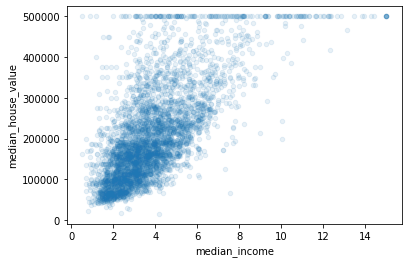

In [129]:
dataset.plot(kind ="scatter", x =  "median_income", y ="median_house_value", alpha= 0.1)

It's possible to combine various attributes, there are for example some attribues that may not be that interesting on their own.
For example it might be more interesting to know the number of bedrooms for household, instead of the total number of beedrooms in a district. 

In [130]:
dataset["rooms_per_household"] = dataset["total_rooms"]/dataset["households"]
dataset["bedrooms_per_room"] = dataset["total_bedrooms"]/dataset["total_rooms"]
dataset["population_per_household"] = dataset["population"]/dataset["households"]
dataset.corr()["median_house_value"].sort_values()

bedrooms_per_room          -0.249196
latitude                   -0.149295
population_per_household   -0.121853
longitude                  -0.044062
population                 -0.019003
total_bedrooms              0.056667
households                  0.074249
housing_median_age          0.113585
rooms_per_household         0.130928
total_rooms                 0.134697
median_income               0.677502
median_house_value          1.000000
Name: median_house_value, dtype: float64

# Prepare the data to better expose the underlying data patterns for machine learning algoritmhs

Most machine learnings algorithms are incapable of working with NaN Values, so there must be a way to take care of those values.
Scikit learn provides a class to take care of missing values

In [131]:
from sklearn.impute import SimpleImputer
# For every attribute calculate the median and store in the statistics_ property.
imputer = SimpleImputer(strategy="median")
try:
    imputer.fit(dataset)
except Exception as e:
    print(e)

Cannot use median strategy with non-numeric data:
could not convert string to float: 'INLAND'


Since is impossible to calculate the median for non numerical attributes, we need to get rid of ocean_proximity.

In [132]:
numeric_dataset = dataset.drop("ocean_proximity",axis = 1)
imputer.fit(numeric_dataset)

SimpleImputer(strategy='median')

Now we have to take care of ocean_proximity.

In [133]:
dataset["ocean_proximity"].value_counts()

<1H OCEAN     1795
INLAND        1324
NEAR OCEAN     572
NEAR BAY       436
ISLAND           1
Name: ocean_proximity, dtype: int64

In total there are only 5 elements, thus this attribute is called a categorical attribute, because each value represent a category.
Since most of machine learning algorithms prefer to work with numbers we need to encode the information conveyed by this attribute.

In [134]:
from sklearn.preprocessing import OrdinalEncoder
categorical_dataset = dataset[["ocean_proximity"]]
encoder = OrdinalEncoder()
dataset_encoded = encoder.fit_transform(categorical_dataset)

The encoding is the following

In [135]:
pd.DataFrame(dataset_encoded).value_counts().sort_index()

0.0    1795
1.0    1324
2.0       1
3.0     436
4.0     572
dtype: int64

The problem with this approach is that machine learning algorithms will assume nearby values are more similar, but in this case it won't be true.
So we'll do [one-hot encoding](Notes.MD#one-hot-encoding)

In [136]:
from sklearn.preprocessing import OneHotEncoder

categorical_encoder = OneHotEncoder()
# For optimization purposes this is a sparse matrix (There are a lot of zeroes)
attributes_one_hot_encoded = categorical_encoder.fit_transform(categorical_dataset)

Machine learning algorithms don't work well when numerical attributes have very differnt scales.
To get all the attributes to have the same scale we can use either [min-max scaling](Notes.MD#min-max-scaling) or [standardization](Notes.MD#Standardization).
We're going to use standardization and scki-kit learn offers us a transformer.

In [137]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_dataset = dataset.loc[:, dataset.columns != "ocean_proximity"]
standardized_dataset = scaler.fit_transform(numerical_dataset)

So from start to finish the process will something like that.

In [138]:
# First we create a copy of the dataset, it will be clear
# later
dataset_dummy = dataset.copy()

In [139]:
# Then we need to turn our dataset into a numerical one
categorical_dataset = dataset_dummy[["ocean_proximity"]]
encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(categorical_dataset)
# We can get rid of the categorical value since we have encoded correcly
dataset_dummy.drop(["ocean_proximity"],axis=1,inplace=True)
# We don't yet map the one hot encoded features to the dataset 
# https://datascience.stackexchange.com/questions/56444/do-i-need-to-standardize-my-one-hot-encoded-labels#:~:text=NO%2C%20you%20do%20not%20standardize%20labels
# dataset_dummy[encoder.get_feature_names_out()] = encoded_categorical.toarray()
# dataset_dummy.head()

In [140]:
# Once the dataset is all numerical we can take care of nan values
imputer = SimpleImputer(strategy="median")
dataset_dummy = pd.DataFrame(imputer.fit_transform(dataset_dummy), columns = dataset_dummy.columns)
dataset_dummy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.01,36.06,25.0,1505.0,428.0,1392.0,359.0,1.6812,47700.0,4.192201,0.204259,3.877437
1,-119.46,35.14,30.0,2943.0,428.0,1565.0,584.0,2.5313,45800.0,5.039384,0.204259,2.679795
2,-122.44,37.80,52.0,3830.0,428.0,1310.0,963.0,3.4801,500001.0,3.977155,0.204259,1.360332
3,-118.72,34.28,17.0,3051.0,428.0,1705.0,495.0,5.7376,218600.0,6.163636,0.204259,3.444444
4,-121.93,36.62,34.0,2351.0,428.0,1063.0,428.0,3.7250,278000.0,5.492991,0.204259,2.483645


In [141]:
# We can then standardize 

scaler = StandardScaler()
dataset_dummy = pd.DataFrame(scaler.fit_transform(dataset_dummy), columns = dataset_dummy.columns)
# The resulting dataframe is 
dataset_dummy.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,0.255417,0.221941,-0.300740,-0.500566,-0.24197,-0.026548,-0.357860,-1.142376,-1.378493,-0.433677,-0.160427,0.520224
1,0.029766,-0.209477,0.098724,0.150380,-0.24197,0.128764,0.222450,-0.690505,-1.395090,-0.130503,-0.160427,-0.162932
2,-1.464546,1.037884,1.856363,0.551903,-0.24197,-0.100164,1.199951,-0.186169,2.572663,-0.510634,-0.160427,-0.915576
3,0.400837,-0.612759,-0.939881,0.199269,-0.24197,0.254450,-0.007095,1.013807,0.114435,0.271824,-0.160427,0.273237
4,-1.208808,0.484544,0.418295,-0.117603,-0.24197,-0.321910,-0.179898,-0.055993,0.633334,0.031825,-0.160427,-0.274819


In [142]:
# And finally we can add the one hot encoded features back
dataset_dummy[encoder.get_feature_names_out()] = encoded_categorical.toarray()
dataset_dummy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.255417,0.221941,-0.300740,-0.500566,-0.24197,-0.026548,-0.357860,-1.142376,-1.378493,-0.433677,-0.160427,0.520224,0.0,1.0,0.0,0.0,0.0
1,0.029766,-0.209477,0.098724,0.150380,-0.24197,0.128764,0.222450,-0.690505,-1.395090,-0.130503,-0.160427,-0.162932,0.0,1.0,0.0,0.0,0.0
2,-1.464546,1.037884,1.856363,0.551903,-0.24197,-0.100164,1.199951,-0.186169,2.572663,-0.510634,-0.160427,-0.915576,0.0,0.0,0.0,1.0,0.0
3,0.400837,-0.612759,-0.939881,0.199269,-0.24197,0.254450,-0.007095,1.013807,0.114435,0.271824,-0.160427,0.273237,1.0,0.0,0.0,0.0,0.0
4,-1.208808,0.484544,0.418295,-0.117603,-0.24197,-0.321910,-0.179898,-0.055993,0.633334,0.031825,-0.160427,-0.274819,0.0,0.0,0.0,0.0,1.0


This was a tedious task but fortunately scikit learn offers a way to combine all this work together using something called pipeline.

In [143]:
from sklearn.pipeline import Pipeline

# First we define a pipeline for handling numerical data
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ("scaler",StandardScaler())
])


At this stage the problem of categorical values remains, we could use scikit learn's ColumnTrasformer.

In [152]:
from sklearn.compose import ColumnTransformer

numerical_dataset_columns = list(dataset.loc[:, dataset.columns != "ocean_proximity"])
categorical_dataset_columns = ["ocean_proximity"]
pipeline = ColumnTransformer([
    ("num_pipeline", num_pipeline,numerical_dataset_columns),
    ("categorical_trasformation",OneHotEncoder(),categorical_dataset_columns)
])
dataset = pd.DataFrame(pipeline.fit_transform(dataset),columns = dataset_dummy.columns)

And for the record we can see that the results are equal

In [153]:
dataset_dummy.equals(dataset)

True